In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('dados_tratados.csv')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [95]:
df = pd.read_csv('dados_tratados.csv')
df.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                 593.30  
1          Mailed check                    59.9                 542.40  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                 267.40  

[5 rows x 21 columns]

In [96]:
df.drop(columns=['customerID'], inplace=True)

In [97]:
df.dropna(inplace=True)

In [98]:
df.isnull().sum()

Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

In [99]:
target = df['Churn']

In [100]:
df_features = df.drop('Churn', axis=1)

In [101]:
df_encoded = pd.get_dummies(df_features, drop_first=True)

In [102]:
target_encoded = target.map({'No': 0, 'Yes': 1})

In [103]:
df_final = df_encoded.copy()
df_final['Churn'] = target_encoded

In [104]:
# Contagem absoluta
contagem = df_final['Churn'].value_counts()

# Propor√ß√£o relativa
proporcao = df_final['Churn'].value_counts(normalize=True)

print("Contagem:\n", contagem)
print("\nPropor√ß√£o:\n", proporcao)

Contagem:
 Churn
0    5163
1    1869
Name: count, dtype: int64

Propor√ß√£o:
 Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


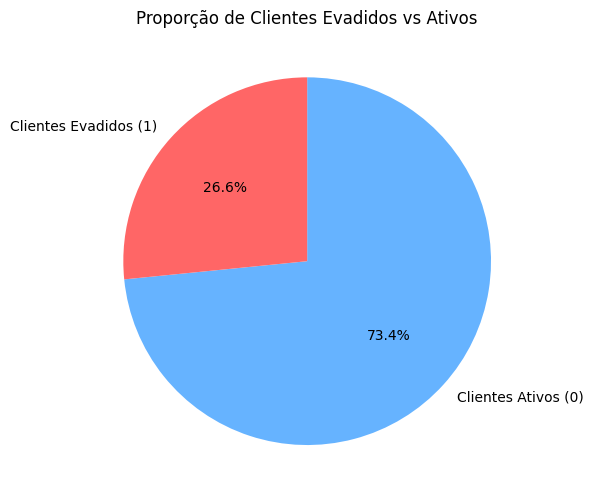

In [105]:
# Recalcular a contagem para garantir que est√° sincronizado
contagem = df_final['Churn'].value_counts()
labels = ['Clientes Ativos (0)', 'Clientes Evadidos (1)']
cores = ['#66b3ff', '#ff6666']

# Gr√°fico de pizza
plt.figure(figsize=(6,6))
plt.pie(contagem, labels=labels, colors=cores, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Propor√ß√£o de Clientes Evadidos vs Ativos')
plt.tight_layout()
plt.show()

In [106]:
# Agrupar por tipo de contrato e calcular propor√ß√£o de churn
churn_por_contrato = df.groupby('account.Contract')['Churn'].value_counts(normalize=True).unstack()

# Converter em percentual
churn_por_contrato = churn_por_contrato * 100

# Exibir resultado
print(churn_por_contrato)

Churn                    No        Yes
account.Contract                      
Month-to-month    57.290323  42.709677
One year          88.722826  11.277174
Two year          97.151335   2.848665


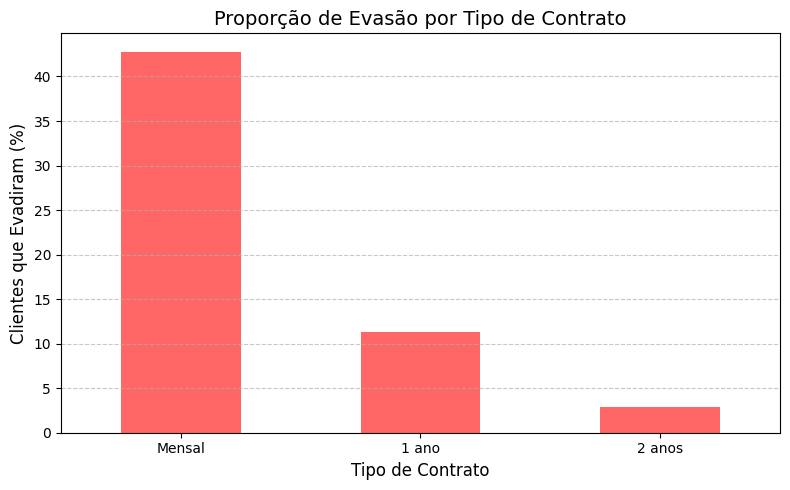

In [107]:
# Renomeando os √≠ndices para portugu√™s
churn_por_contrato_pt = churn_por_contrato.copy()
churn_por_contrato_pt.index = ['Mensal', '1 ano', '2 anos']

# Plotando somente os que evadiram (Churn = Yes)
churn_por_contrato_pt['Yes'].plot(kind='bar', color='#ff6666', figsize=(8,5))

# Estiliza√ß√£o
plt.title('Propor√ß√£o de Evas√£o por Tipo de Contrato', fontsize=14)
plt.ylabel('Clientes que Evadiram (%)', fontsize=12)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [108]:
churn_por_internet = df.groupby('internet.InternetService')['Churn'].value_counts(normalize=True).unstack()
churn_por_internet = churn_por_internet * 100
print(churn_por_internet)

Churn                            No        Yes
internet.InternetService                      
DSL                       81.001656  18.998344
Fiber optic               58.107235  41.892765
No                        92.565789   7.434211


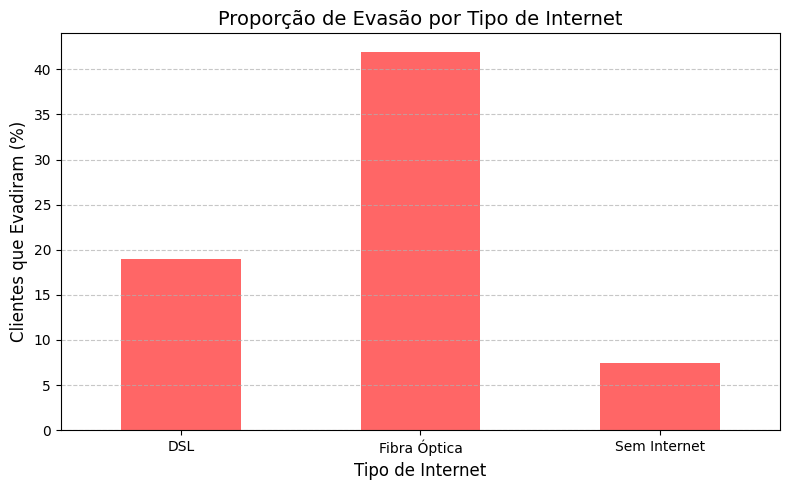

In [109]:
import matplotlib.pyplot as plt

# Traduzindo os r√≥tulos para portugu√™s
churn_por_internet_pt = churn_por_internet.copy()
churn_por_internet_pt.index = ['DSL', 'Fibra √ìptica', 'Sem Internet']

# Plotar apenas os que evadiram
churn_por_internet_pt['Yes'].plot(kind='bar', color='#ff6666', figsize=(8,5))

# Estiliza√ß√£o
plt.title('Propor√ß√£o de Evas√£o por Tipo de Internet', fontsize=14)
plt.ylabel('Clientes que Evadiram (%)', fontsize=12)
plt.xlabel('Tipo de Internet', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [110]:
churn_por_pagamento = df.groupby('account.PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
churn_por_pagamento = churn_por_pagamento * 100
print(churn_por_pagamento)

Churn                             No        Yes
account.PaymentMethod                          
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


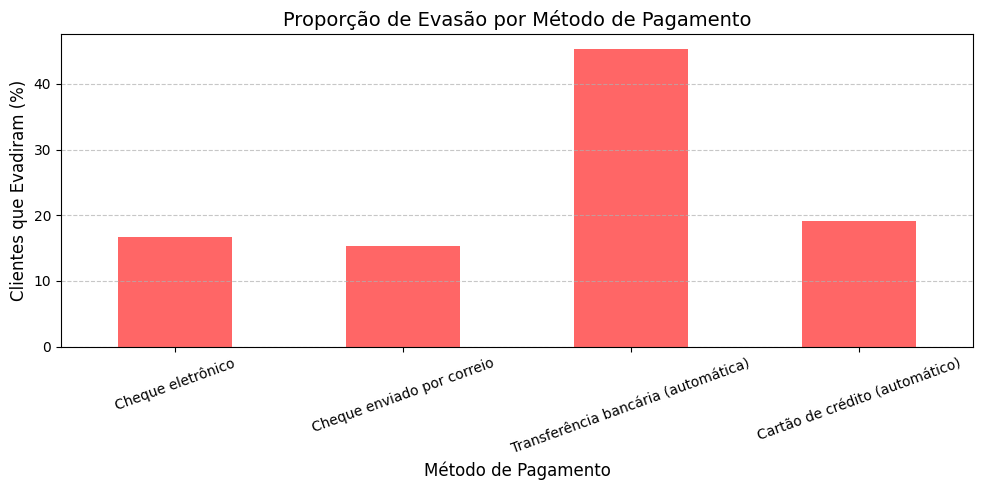

In [111]:
# Copiar e traduzir os nomes para portugu√™s
churn_por_pagamento_pt = churn_por_pagamento.copy()
churn_por_pagamento_pt.index = [
    'Cheque eletr√¥nico',
    'Cheque enviado por correio',
    'Transfer√™ncia banc√°ria (autom√°tica)',
    'Cart√£o de cr√©dito (autom√°tico)'
]

# Plotar a coluna 'Yes' (clientes que evadiram)
churn_por_pagamento_pt['Yes'].plot(kind='bar', color='#ff6666', figsize=(10,5))

# Estiliza√ß√£o
plt.title('Propor√ß√£o de Evas√£o por M√©todo de Pagamento', fontsize=14)
plt.ylabel('Clientes que Evadiram (%)', fontsize=12)
plt.xlabel('M√©todo de Pagamento', fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [112]:
churn_por_suporte = df.groupby('internet.TechSupport')['Churn'].value_counts(normalize=True).unstack()
churn_por_suporte = churn_por_suporte * 100
print(churn_por_suporte)

Churn                        No        Yes
internet.TechSupport                      
No                    58.352535  41.647465
No internet service   92.565789   7.434211
Yes                   84.803922  15.196078


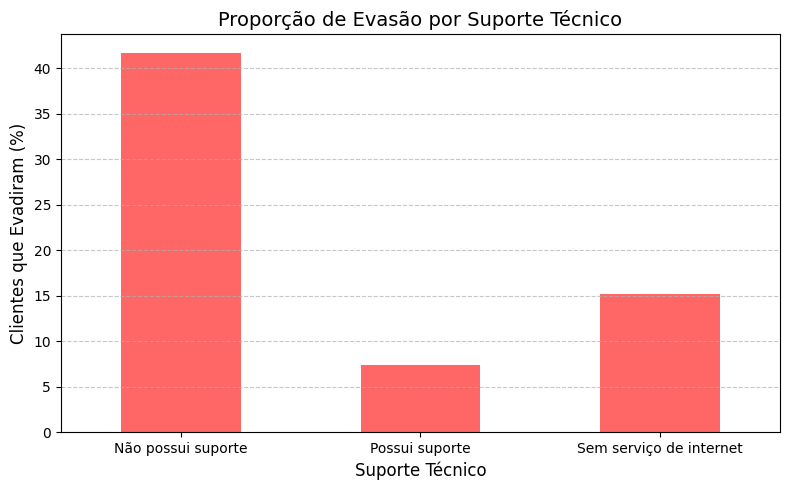

In [113]:
# Copiar e traduzir os √≠ndices
churn_por_suporte_pt = churn_por_suporte.copy()
churn_por_suporte_pt.index = ['N√£o possui suporte', 'Possui suporte', 'Sem servi√ßo de internet']

# Plotar apenas os que evadiram
churn_por_suporte_pt['Yes'].plot(kind='bar', color='#ff6666', figsize=(8,5))

# Estiliza√ß√£o
plt.title('Propor√ß√£o de Evas√£o por Suporte T√©cnico', fontsize=14)
plt.ylabel('Clientes que Evadiram (%)', fontsize=12)
plt.xlabel('Suporte T√©cnico', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [114]:
# Separar X e y
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [115]:
# Criar e treinar o modelo
modelo_arvore = DecisionTreeClassifier(random_state=42)
modelo_arvore.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [116]:
# Fazer previs√µes com os dados de teste
y_pred = modelo_arvore.predict(X_test)

# Avaliar
print("Acur√°cia:", accuracy_score(y_test, y_pred))
print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confus√£o:\n", confusion_matrix(y_test, y_pred))

Acur√°cia: 0.7171286425017769

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1033
           1       0.47      0.47      0.47       374

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407


Matriz de Confus√£o:
 [[835 198]
 [200 174]]


In [117]:
# Modelo com balanceamento
modelo_balanceado = DecisionTreeClassifier(class_weight='balanced', random_state=42)
modelo_balanceado.fit(X_train, y_train)

# Prever
y_pred_bal = modelo_balanceado.predict(X_test)

# Avaliar
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Acur√°cia:", accuracy_score(y_test, y_pred_bal))
print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred_bal))
print("\nMatriz de Confus√£o:\n", confusion_matrix(y_test, y_pred_bal))

Acur√°cia: 0.7277896233120114

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1033
           1       0.49      0.49      0.49       374

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407


Matriz de Confus√£o:
 [[841 192]
 [191 183]]


In [118]:
# Criar modelo com hiperpar√¢metros ajustados
modelo_ajustado = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

# Treinar o modelo
modelo_ajustado.fit(X_train, y_train)

# Prever
y_pred_ajustado = modelo_ajustado.predict(X_test)

# Avaliar
print("Acur√°cia:", accuracy_score(y_test, y_pred_ajustado))
print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred_ajustado))
print("\nMatriz de Confus√£o:\n", confusion_matrix(y_test, y_pred_ajustado))

Acur√°cia: 0.7228144989339019

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.92      0.68      0.78      1033
           1       0.49      0.83      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.80      0.72      0.74      1407


Matriz de Confus√£o:
 [[706 327]
 [ 63 311]]


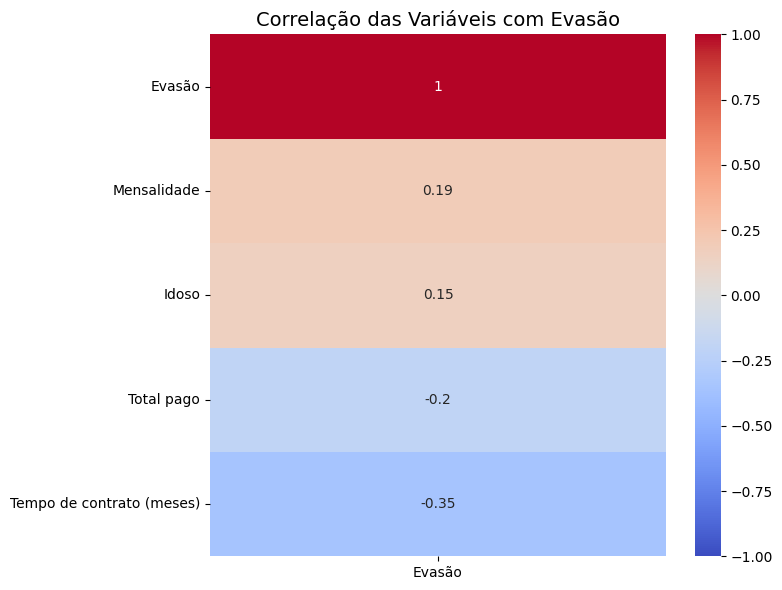

In [122]:
# Dicion√°rio de tradu√ß√£o das colunas
nomes_em_portugues = {
    'customer.tenure': 'Tempo de contrato (meses)',
    'account.Charges.Monthly': 'Mensalidade',
    'account.Charges.Total': 'Total pago',
    'customer.SeniorCitizen': 'Idoso',
    'Churn': 'Evas√£o'
}

# Selecionar apenas as colunas num√©ricas + Churn
colunas_para_correlacao = list(nomes_em_portugues.keys())
df_corr = df_final[colunas_para_correlacao].rename(columns=nomes_em_portugues)

# Gerar matriz de correla√ß√£o
corr_matrix_pt = df_corr.corr(numeric_only=True)

# Gr√°fico
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_pt[['Evas√£o']].sort_values(by='Evas√£o', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correla√ß√£o das Vari√°veis com Evas√£o', fontsize=14)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1416564759.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Churn', y='customer.tenure', palette='Set2')


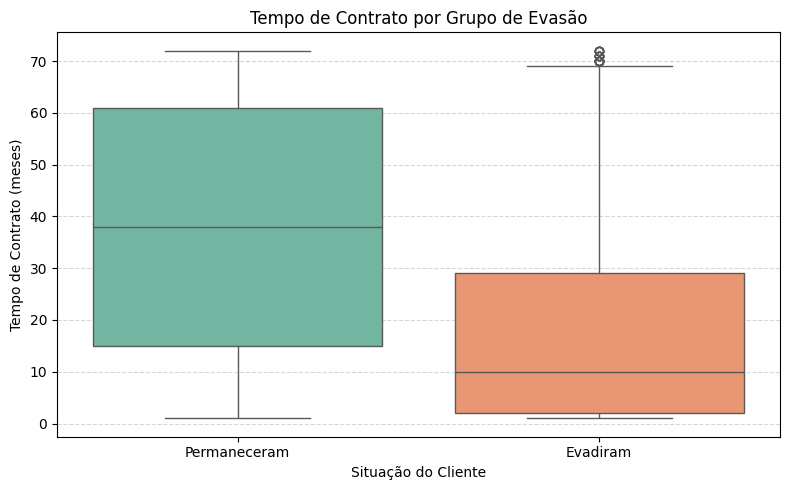

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Traduzir r√≥tulos da vari√°vel alvo
df_plot = df_final.copy()
df_plot['Churn'] = df_plot['Churn'].map({0: 'Permaneceram', 1: 'Evadiram'})

plt.figure(figsize=(8,5))
sns.boxplot(data=df_plot, x='Churn', y='customer.tenure', palette='Set2')

plt.title('Tempo de Contrato por Grupo de Evas√£o')
plt.xlabel('Situa√ß√£o do Cliente')
plt.ylabel('Tempo de Contrato (meses)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-118815726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Churn', y='account.Charges.Total', palette='Set2')


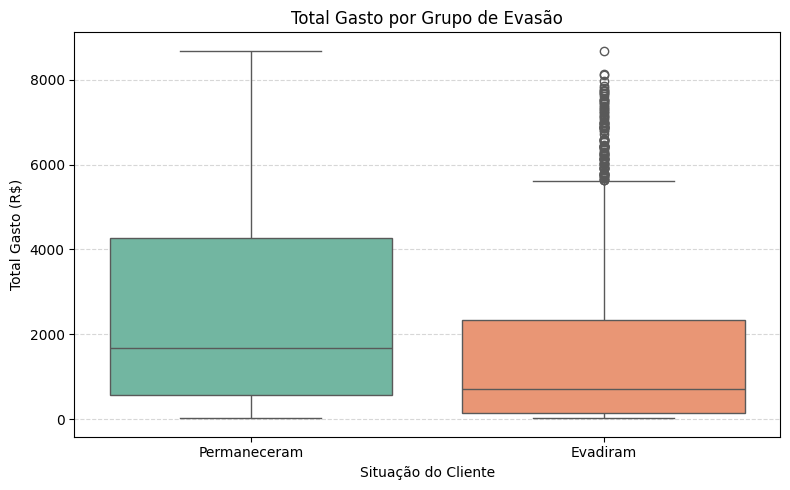

In [126]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_plot, x='Churn', y='account.Charges.Total', palette='Set2')

plt.title('Total Gasto por Grupo de Evas√£o')
plt.xlabel('Situa√ß√£o do Cliente')
plt.ylabel('Total Gasto (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [127]:
# Separar vari√°veis independentes e alvo
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

# Separar em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [128]:
print("Tamanho total:", len(df_final))
print("Tamanho treino:", len(X_train))
print("Tamanho teste:", len(X_test))

Tamanho total: 7032
Tamanho treino: 4922
Tamanho teste: 2110


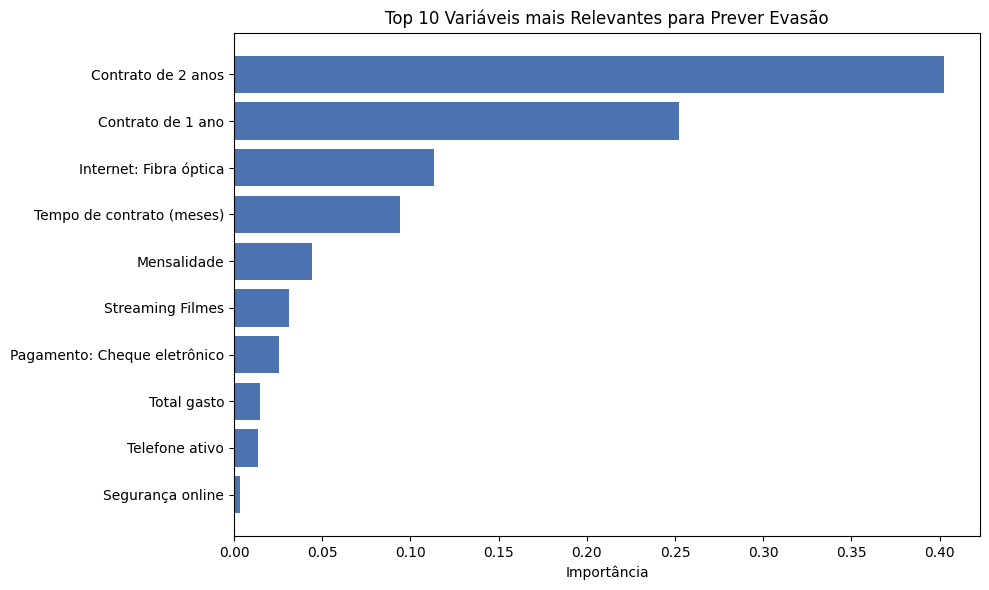

In [132]:
# Tradu√ß√£o dos nomes para portugu√™s
traducao = {
    'account.Contract_Two year': 'Contrato de 2 anos',
    'account.Contract_One year': 'Contrato de 1 ano',
    'internet.InternetService_Fiber optic': 'Internet: Fibra √≥ptica',
    'customer.tenure': 'Tempo de contrato (meses)',
    'account.Charges.Monthly': 'Mensalidade',
    'internet.StreamingMovies_Yes': 'Streaming Filmes',
    'account.PaymentMethod_Electronic check': 'Pagamento: Cheque eletr√¥nico',
    'account.Charges.Total': 'Total gasto',
    'phone.PhoneService_Yes': 'Telefone ativo',
    'internet.OnlineSecurity_Yes': 'Seguran√ßa online'
}

# Aplicar a tradu√ß√£o no top 10
top10 = df_importancias.sort_values(by='Import√¢ncia', ascending=False).head(10).copy()
top10['Vari√°vel'] = top10['Vari√°vel'].map(traducao).fillna(top10['Vari√°vel'])

# Gerar gr√°fico com nomes em portugu√™s
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top10['Vari√°vel'][::-1], top10['Import√¢ncia'][::-1], color='#4C72B0')
plt.xlabel('Import√¢ncia')
plt.title('Top 10 Vari√°veis mais Relevantes para Prever Evas√£o')
plt.tight_layout()
plt.show()

In [135]:
#Instanciar o scaler
scaler = StandardScaler()

# Ajustar e transformar os dados de treino e teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [138]:
# Criar e treinar o modelo
modelo_log = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
modelo_log.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [139]:
# Previs√µes
y_pred_log = modelo_log.predict(X_test_scaled)

# Avalia√ß√£o
print("Acur√°cia:", accuracy_score(y_test, y_pred_log))
print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred_log))
print("\nMatriz de Confus√£o:\n", confusion_matrix(y_test, y_pred_log))

Acur√°cia: 0.7388625592417062

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1549
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110


Matriz de Confus√£o:
 [[1112  437]
 [ 114  447]]


In [140]:
# Fazer previs√µes
y_pred_log = modelo_log.predict(X_test_scaled)

# Avaliar o modelo
print("Acur√°cia:", accuracy_score(y_test, y_pred_log))
print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred_log))
print("\nMatriz de Confus√£o:\n", confusion_matrix(y_test, y_pred_log))

Acur√°cia: 0.7388625592417062

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1549
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110


Matriz de Confus√£o:
 [[1112  437]
 [ 114  447]]


#üìù Relat√≥rio Final ‚Äì Projeto Telecom X ‚Äì Previs√£o de Evas√£o de Cliente
Objetivo do Projeto Desenvolver modelos preditivos capazes de identificar
clientes com alta probabilidade de cancelar os servi√ßos da Telecom X, permitindo a√ß√µes de reten√ß√£o mais assertivas e estrat√©gicas.

#üß™ Etapas Realizadas

### ‚úÖ 1. Pr√©-processamento dos Dados
Remo√ß√£o de colunas irrelevantes (como customerID).

- Exclus√£o de registros com valores nulos.

- Aplica√ß√£o de one-hot encoding para vari√°veis categ√≥ricas.

- Avalia√ß√£o de balanceamento da vari√°vel alvo (Churn).

- Aplica√ß√£o de t√©cnicas de balanceamento: class_weight='balanced' e SMOTE.

### ‚úÖ 2. An√°lise Explorat√≥ria e Correla√ß√£o
C√°lculo da propor√ß√£o de evas√£o: cerca de 27% dos clientes evadem.

- Visualiza√ß√µes em portugu√™s para facilitar a leitura.

- Matriz de correla√ß√£o identificou vari√°veis altamente associadas √† evas√£o (tempo de contrato, tipo de contrato, suporte t√©cnico, etc.).

- Boxplots e scatter plots mostraram padr√µes relevantes nas vari√°veis Tempo de contrato e Total gasto.

### ‚úÖ 3. Modelagem Preditiva
- Foram testados dois modelos com abordagens complementares:

####üî∑ Modelo 1: √Årvore de Decis√£o (N√£o requer normaliza√ß√£o.)

- F√°cil de interpretar.

- Atingiu recall de 49% para evas√£o, indicando limita√ß√µes em detectar clientes que realmente evadem.

####üî∂ Modelo 2: Regress√£o Log√≠stica (com normaliza√ß√£o)

- Requer normaliza√ß√£o com StandardScaler.

- Atingiu recall de 80%, conseguindo prever a maior parte dos churns reais.

- Apresentou 51% de precis√£o para churn, com um custo de falsos positivos.

### ‚úÖ 4. Interpreta√ß√£o da Import√¢ncia das Vari√°veis
- As vari√°veis mais relevantes foram: Tempo de contrato, Mensalidade, Total gasto, Internet: Fibra √≥ptica, Contrato de 2 anos, entre outras.

- Gr√°ficos foram traduzidos para facilitar a apresenta√ß√£o dos insights.


#üìä Compara√ß√£o dos Modelos
M√©trica	√Årvore de Decis√£o	Regress√£o Log√≠stica:
- Acur√°cia	72%	74% ‚úÖ
- Recall (Churn)	49%	80% ‚úÖ
- Precision (Churn)	49%	51%
- F1-score (Churn)	49%	62% ‚úÖ

#üí° Justificativa do Desempenho
- ‚ÄúO modelo de Regress√£o Log√≠stica conseguiu identificar 80% dos clientes que realmente evadem, com um custo de 49% de falsos positivos. Considerando o objetivo do neg√≥cio ‚Äî prevenir a evas√£o ‚Äî, essa troca pode ser aceit√°vel dependendo da capacidade de atendimento da equipe de reten√ß√£o.‚Äù


#üß† Conclus√£o Estrat√©gica
- A Telecom poder√° focar esfor√ßos nos clientes com alta chance de evas√£o, priorizando a√ß√µes de reten√ß√£o.

- Recomenda-se um follow-up automatizado para os casos previstos como churn, otimizando o tempo da equipe de atendimento.

- O modelo pode ser integrado com o sistema interno da empresa e reavaliado periodicamente com novos dados para manter a efic√°cia.


# üß∞ Tecnologias Utilizadas
- Python (pandas, scikit-learn, matplotlib, seaborn)

- Jupyter/Colab

- Machine Learning supervisionado

- T√©cnicas de balanceamento e pr√©-processamento de dados

‚òï Agradecimentos

Gostaria de agradecer sinceramente a todos que dedicaram seu tempo para acompanhar este projeto. A experi√™ncia de desenvolver esta solu√ß√£o para a previs√£o de evas√£o de clientes na Telecom X foi extremamente enriquecedora ‚Äî n√£o apenas pelo desafio t√©cnico, mas tamb√©m pela oportunidade de aplicar estrat√©gias reais de an√°lise de dados, modelagem e tomada de decis√£o. Espero que os insights gerados aqui contribuam de forma significativa para a constru√ß√£o de solu√ß√µes mais inteligentes, estrat√©gicas e humanas no relacionamento com o cliente.

Muito obrigada! üíô